Genre Classification Dataset IMDb


# Import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#Read the training data


In [22]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
print(train_data.describe())
print(train_data.isnull().sum())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  
Title          0
Genre          0
Description    0
dtype: int64


In [8]:
train_data.duplicated().sum()

0

#Read the testing data

In [23]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['id', 'Title', 'Description'], engine='python')
print(test_data.describe())
print(test_data.isnull().sum())

                 id
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000
id             0
Title          0
Description    0
dtype: int64


 #Plot the distribution of genres in the training data

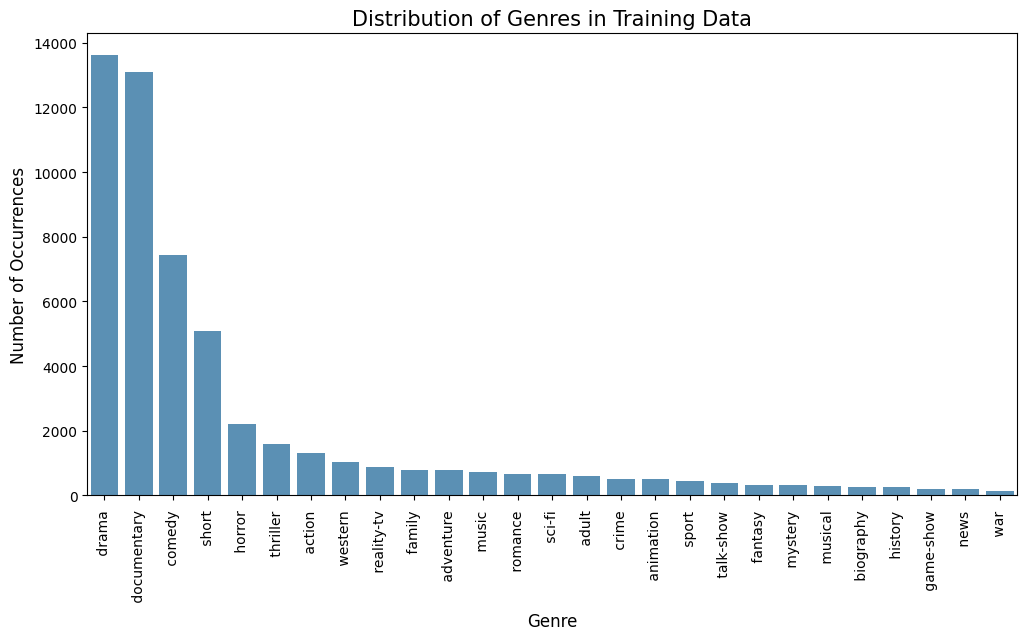

In [24]:
import matplotlib.pyplot as plt

genre_counts = train_data['Genre'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.title('Distribution of Genres in Training Data', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Cleaning the text

In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text


#Applying that cleaning on text and training dataset


In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

#split the data and model training


In [33]:
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)


In [37]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.44526422576777647

# Prediction on test data


In [34]:
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [41]:
test_data.to_csv("/content/predicted_genres.csv", index=False)
print(pd.DataFrame(test_data.head()))


   id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  \
0   L.R. Brane loves his life - his car, his apar...   
1   Spain, March 1964: Quico is a very naughty ch...   
2   One year in the life of Albin and his family ...   
3   His father has died, he hasn't spoken with hi...   
4   Before he was known internationally as a mart...   

                                       Text_cleaning Predicted_Genre  
0  brane loves life car apartment job especially ...          drama   
1  spain march quico naughty child three belongin...          drama   
2  one year life albin family shepherds north tra...    documentary   
3  father died hasnt spoken brother years serious...          drama   
4  known internationally martial arts superstar b...          drama